# TV Adaptation Analysis

In [1]:
%matplotlib inline
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True)
#sns.set(style="white", palette="pastel", color_codes=True)
from patsy import dmatrices
from patsy import dmatrix
import statsmodels.api as sm
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
import scipy.stats as stats
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn import linear_model

In [2]:
with open("modeldata.pkl", 'r') as picklefile: 
    modeldf = pickle.load(picklefile)

### Define Functions

In [3]:
def jointplot(xfield, yfield, data):
    g = sns.jointplot(xfield, yfield, data=data, color="b", size=7)

def kdejointplot(xfield, yfield, data):
    g = sns.jointplot(xfield, yfield, data=data, kind="kde",color="b", size=7)
    g.plot_joint(plt.scatter, c="w", s=50, linewidth=1, marker="+")
    
def getregressdata(yfield, xfield1, data):
    return dmatrices(yfield + ' ~ ' + xfield1, 
                     data = data, return_type = 'dataframe')

def testtrainsplit(signal, features, testratio):
    return train_test_split(signal, features, test_size=testratio, random_state=42)

def regress(signal, features):
    model = sm.OLS(signal, features)
    return model.fit()

In [4]:
modeldf['logepisodes'] = np.log(modeldf['episodes'])
modeldf['logdomesticgross'] = np.log(modeldf['domesticgross'])

### Episodes

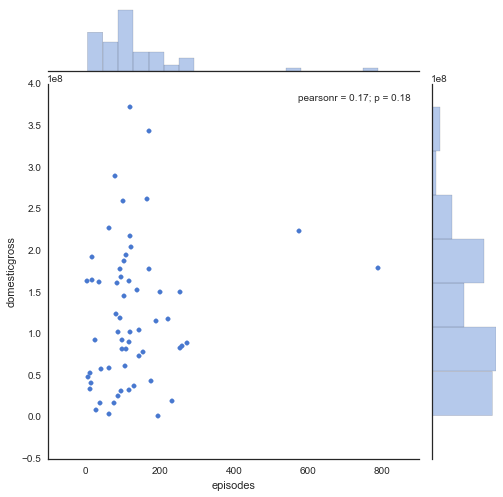

In [6]:
g = jointplot("episodes", "domesticgross", modeldf)

In [7]:
y_ep, X_ep = getregressdata('domesticgross', 'episodes', modeldf)
y_ep_train, y_ep_test, X_ep_train, X_ep_test = train_test_split(y_ep, X_ep, test_size=.15, random_state=42)

In [8]:
type(X_ep_train)

numpy.ndarray

In [9]:
res_ep = regress(y_ep_train, X_ep_train)
res_ep.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.7129
Date:                Fri, 09 Oct 2015   Prob (F-statistic):              0.403
Time:                        09:07:40   Log-Likelihood:                -1000.6
No. Observations:                  51   AIC:                             2005.
Df Residuals:                      49   BIC:                             2009.
Df Model:                           1                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.031e+08   1.69e+07      6.095      0.000      6.91e+07  1.37e+08
x1          8.319e+04   9.85e+04      0.844      0.403     -1.15e+05  2.81e+05
==============================================================================
Omnibus:                        9.067   Durbin-Watson:                   1.705
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.351
Skew:                           0.920   Prob(JB):                       0.0154
Kurtosis:                       3.737   Cond. No.                         254.
==============================================================================
"""

In [10]:
y_pred_ep = res_ep.predict(X_ep_test)
mean_squared_error(y_pred_ep, y_ep_test)

9137286122230450.0

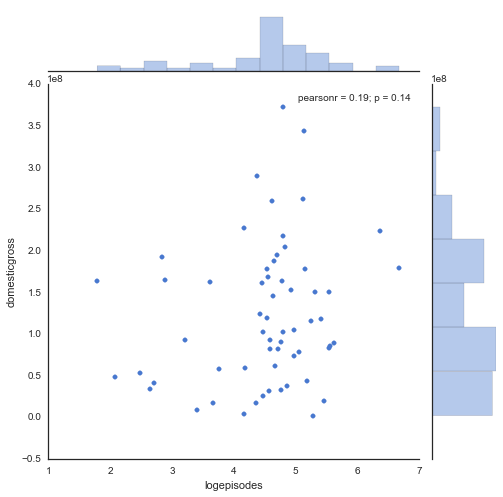

In [11]:
g = jointplot("logepisodes", "domesticgross", modeldf)

In [12]:
y_logep, X_logep = getregressdata('domesticgross', 'np.log(episodes)', modeldf)
y_logep_train, y_logep_test, X_logep_train, X_logep_test = testtrainsplit(y_logep, X_logep, .15)

In [13]:
res_logep = regress(y_logep_train, X_logep_train)
res_logep.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.334
Date:                Fri, 09 Oct 2015   Prob (F-statistic):              0.254
Time:                        09:07:41   Log-Likelihood:                -1000.3
No. Observations:                  51   AIC:                             2005.
Df Residuals:                      49   BIC:                             2008.
Df Model:                           1                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       5.102e+07   5.54e+07      0.921      0.361     -6.03e+07  1.62e+08
x1          1.396e+07   1.21e+07      1.155      0.254     -1.03e+07  3.82e+07
==============================================================================
Omnibus:                        8.142   Durbin-Watson:                   1.589
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                7.300
Skew:                           0.872   Prob(JB):                       0.0260
Kurtosis:                       3.626   Cond. No.                         23.3
==============================================================================
"""

In [14]:
y_pred_logep = res_logep.predict(X_logep_test)
mean_squared_error(y_pred_logep, y_logep_test)

9241824044777066.0

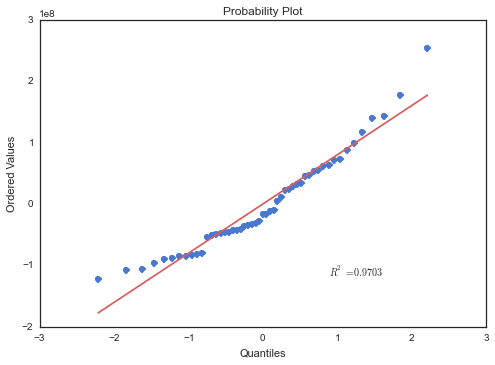

In [15]:
stats.probplot(res_logep.resid, dist="norm", plot=plt)
plt.show()

### Awards

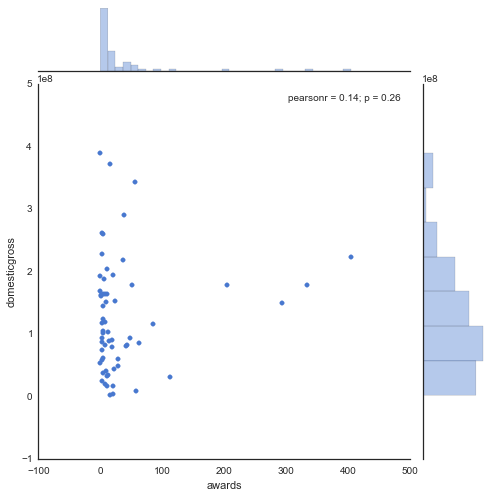

In [16]:
jointplot("awards", "domesticgross", modeldf)

In [17]:
y_aw, X_aw = getregressdata('domesticgross', 'awards', modeldf)
y_aw_train, y_aw_test, X_aw_train, X_aw_test = testtrainsplit(y_aw, X_aw, .15)

In [18]:
res_aw = regress(y_aw_train, X_aw_train)
res_aw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.053
Date:                Fri, 09 Oct 2015   Prob (F-statistic):              0.310
Time:                        09:07:43   Log-Likelihood:                -1023.9
No. Observations:                  52   AIC:                             2052.
Df Residuals:                      50   BIC:                             2056.
Df Model:                           1                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.238e+08   1.34e+07      9.248      0.000      9.69e+07  1.51e+08
x1          1.503e+05   1.46e+05      1.026      0.310     -1.44e+05  4.45e+05
==============================================================================
Omnibus:                       11.227   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.107
Skew:                           1.004   Prob(JB):                      0.00387
Kurtosis:                       4.047   Cond. No.                         100.
==============================================================================
"""

In [19]:
y_pred_aw = res_aw.predict(X_aw_test)
mean_squared_error(y_pred_aw, y_aw_test)

9533635600474214.0

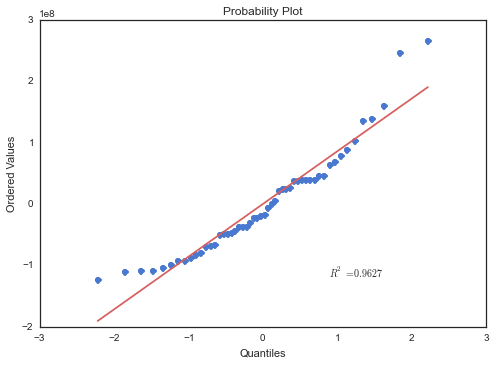

In [20]:
stats.probplot(res_aw.resid, dist="norm", plot=plt)
plt.show()

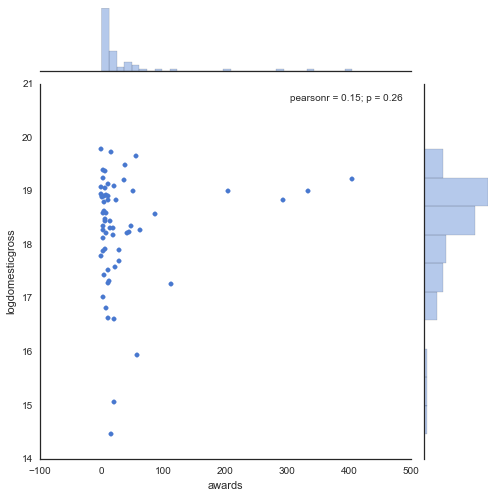

In [21]:
jointplot("awards", "logdomesticgross", modeldf)

In [22]:
y_log, X_aw = getregressdata('np.log(domesticgross)', 'awards', modeldf)
y_logaw_train, y_logaw_test, X_aw_train, X_aw_test = testtrainsplit(y_log, X_aw, .15)

In [23]:
res_logaw = regress(y_logaw_train, X_aw_train)
res_logaw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.323
Date:                Fri, 09 Oct 2015   Prob (F-statistic):              0.256
Time:                        09:07:44   Log-Likelihood:                -67.825
No. Observations:                  52   AIC:                             139.6
Df Residuals:                      50   BIC:                             143.6
Df Model:                           1                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         18.3104      0.139    132.124      0.000        18.032    18.589
x1             0.0017      0.002      1.150      0.256        -0.001     0.005
==============================================================================
Omnibus:                       16.068   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.819
Skew:                          -1.153   Prob(JB):                     4.97e-05
Kurtosis:                       4.958   Cond. No.                         100.
==============================================================================
"""

In [24]:
y_pred_logaw = np.exp(res_logaw.predict(X_aw_test))
mean_squared_error(y_pred_logaw, y_logaw_test)

9049435927815100.0

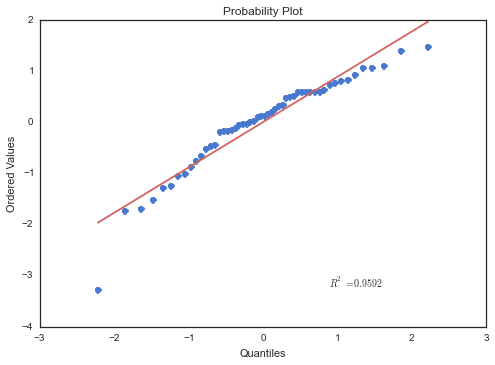

In [25]:
stats.probplot(res_logaw.resid, dist="norm", plot=plt)
plt.show()

### Distance

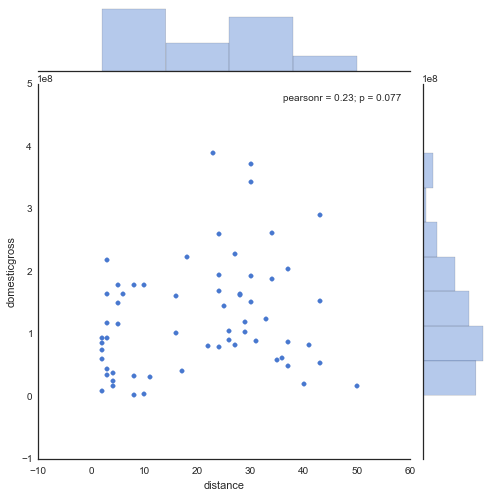

In [26]:
jointplot("distance", "domesticgross", modeldf)

In [27]:
y_dist, X_dist = getregressdata('domesticgross', 'distance', modeldf)
y_dist_train, y_dist_test, X_dist_train, X_dist_test = testtrainsplit(y_dist, X_dist, .15)

In [28]:
res_dist = regress(y_dist_train, X_dist_train)
res_dist.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.688
Date:                Fri, 09 Oct 2015   Prob (F-statistic):              0.200
Time:                        09:07:45   Log-Likelihood:                -1023.6
No. Observations:                  52   AIC:                             2051.
Df Residuals:                      50   BIC:                             2055.
Df Model:                           1                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.064e+08   2.15e+07      4.959      0.000      6.33e+07   1.5e+08
x1           1.11e+06   8.54e+05      1.299      0.200     -6.06e+05  2.83e+06
==============================================================================
Omnibus:                        7.173   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                6.205
Skew:                           0.790   Prob(JB):                       0.0449
Kurtosis:                       3.607   Cond. No.                         44.6
==============================================================================
"""

In [29]:
y_pred_dist = (res_dist.predict(X_dist_test))
mean_squared_error(y_pred_dist, y_dist_test)

8631175005559866.0

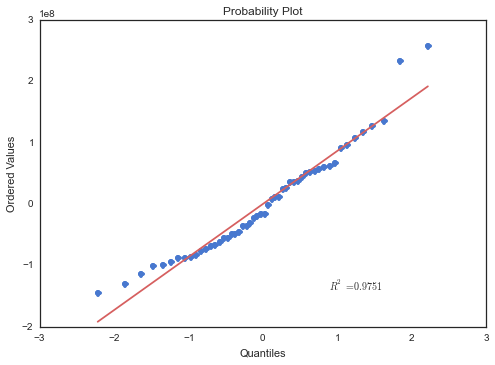

In [30]:
stats.probplot(res_dist.resid, dist="norm", plot=plt)
plt.show()

### Network

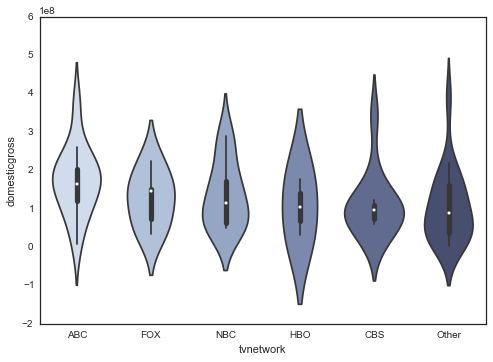

In [31]:
pal = sns.cubehelix_palette(6, rot=-.1, dark=.3)
g = sns.violinplot(x="tvnetwork", y='domesticgross', data=modeldf, palette=pal)

In [32]:
y_net, X_net = getregressdata('domesticgross', "C(tvnetwork,Treatment('Other'))", modeldf)
y_net_train, y_net_test, X_net_train, X_net_test = testtrainsplit(y_net, X_net, .15)

In [33]:
res_net = regress(y_net_train, X_net_train)
res_net.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1.605
Date:                Fri, 09 Oct 2015   Prob (F-statistic):              0.178
Time:                        09:07:47   Log-Likelihood:                -1020.2
No. Observations:                  52   AIC:                             2052.
Df Residuals:                      46   BIC:                             2064.
Df Model:                           5                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.125e+08   2.13e+07      5.270      0.000      6.95e+07  1.55e+08
x1           7.96e+07   3.44e+07      2.313      0.025      1.03e+07  1.49e+08
x2         -2.104e+07   3.56e+07     -0.592      0.557     -9.26e+07  5.06e+07
x3          1.265e+07   4.37e+07      0.289      0.774     -7.54e+07  1.01e+08
x4         -7.508e+06    6.4e+07     -0.117      0.907     -1.36e+08  1.21e+08
x5          2.288e+07   3.44e+07      0.665      0.509     -4.64e+07  9.21e+07
==============================================================================
Omnibus:                       11.537   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.651
Skew:                           0.987   Prob(JB):                      0.00295
Kurtosis:                       4.217   Cond. No.                         6.15
==============================================================================
"""

In [34]:
y_pred_net = (res_net.predict(X_net_test))
mean_squared_error(y_pred_net, y_net_test)

12163859882848890.0

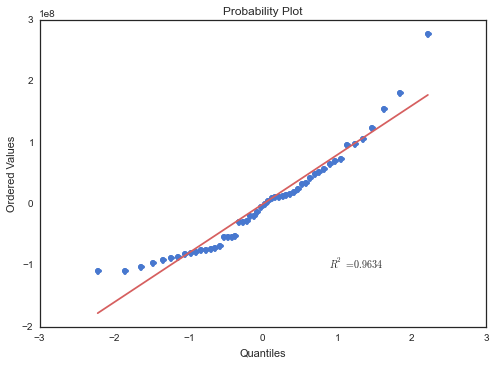

In [35]:
stats.probplot(res_net.resid, dist="norm", plot=plt)
plt.show()

### Animated

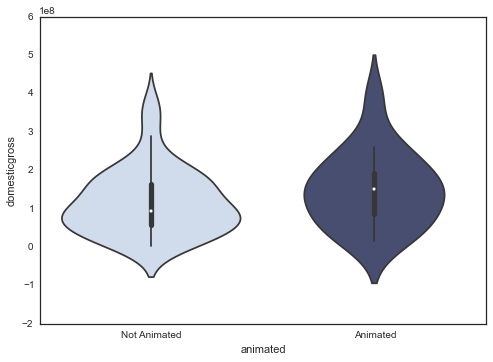

In [36]:
pal = sns.cubehelix_palette(2, rot=-.1, dark=.3)
g = sns.violinplot(x='animated', y='domesticgross', data=modeldf, palette=pal)

In [37]:
y_anim, X_anim = getregressdata('domesticgross', "C(animated,Treatment('Not Animated'))", modeldf)
y_anim_train, y_anim_test, X_anim_train, X_anim_test = testtrainsplit(y_anim, X_anim, .15)

In [38]:
res_anim = regress(y_anim_train, X_anim_train)
res_anim.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     1.997
Date:                Fri, 09 Oct 2015   Prob (F-statistic):              0.164
Time:                        09:07:48   Log-Likelihood:                -1023.4
No. Observations:                  52   AIC:                             2051.
Df Residuals:                      50   BIC:                             2055.
Df Model:                           1                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.186e+08   1.43e+07      8.291      0.000      8.99e+07  1.47e+08
x1          3.764e+07   2.66e+07      1.413      0.164     -1.59e+07  9.11e+07
==============================================================================
Omnibus:                        7.589   Durbin-Watson:                   1.724
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                6.634
Skew:                           0.802   Prob(JB):                       0.0363
Kurtosis:                       3.698   Cond. No.                         2.43
==============================================================================
"""

In [39]:
y_pred_anim = (res_anim.predict(X_anim_test))
mean_squared_error(y_pred_anim, y_anim_test)

9906917012202054.0

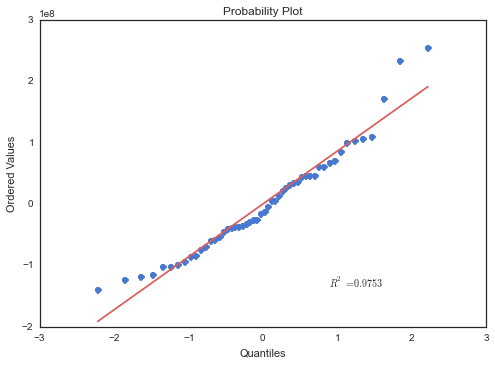

In [40]:
stats.probplot(res_anim.resid, dist="norm", plot=plt)
plt.show()

### Model 1

In [41]:
y1, X1 = dmatrices("domesticgross ~ episodes + awards + distance" \
                   "+ C(tvnetwork,Treatment('Other')) + C(animated,Treatment('Not Animated'))",
                    data = modeldf, return_type = 'dataframe')
y1_train, y1_test, X1_train, X1_test = testtrainsplit(y1, X1, .15)

In [42]:
res1 = regress(y1_train, X1_train)
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1.329
Date:                Fri, 09 Oct 2015   Prob (F-statistic):              0.252
Time:                        09:07:50   Log-Likelihood:                -994.42
No. Observations:                  51   AIC:                             2009.
Df Residuals:                      41   BIC:                             2028.
Df Model:                           9                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       4.591e+07   2.94e+07      1.562      0.126     -1.34e+07  1.05e+08
x1          7.157e+07   4.09e+07      1.748      0.088     -1.11e+07  1.54e+08
x2         -1.088e+07   4.72e+07     -0.230      0.819     -1.06e+08  8.45e+07
x3          1.841e+07   4.88e+07      0.377      0.708     -8.02e+07  1.17e+08
x4          2.171e+05   7.35e+07      0.003      0.998     -1.48e+08  1.49e+08
x5          1.526e+07   4.68e+07      0.326      0.746     -7.93e+07   1.1e+08
x6            3.9e+07   2.91e+07      1.340      0.188     -1.98e+07  9.78e+07
x7          2.972e+04    1.4e+05      0.212      0.833     -2.54e+05  3.13e+05
x8          2.559e+05    2.9e+05      0.882      0.383      -3.3e+05  8.42e+05
x9          1.459e+06   1.31e+06      1.112      0.273     -1.19e+06  4.11e+06
==============================================================================
Omnibus:                        4.654   Durbin-Watson:                   1.472
Prob(Omnibus):                  0.098   Jarque-Bera (JB):                3.745
Skew:                           0.646   Prob(JB):                        0.154
Kurtosis:                       3.306   Cond. No.                     1.38e+03
==============================================================================

Warnings:
[1] The condition number is large, 1.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
y1_pred = (res1.predict(X1_test))
mean_squared_error(y1_pred, y1_test)

7376413998918430.0

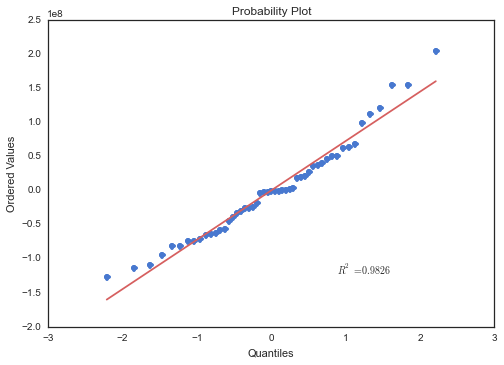

In [45]:
stats.probplot(res1.resid, dist="norm", plot=plt)
plt.show()

### Model 2 (Log Episodes)

In [46]:
y2, X2 = dmatrices("domesticgross ~ np.log(episodes) + awards + distance" \
                   "+ C(tvnetwork,Treatment('Other')) + C(animated,Treatment('Not Animated'))",
                    data = modeldf, return_type = 'dataframe')
y2_train, y2_test, X2_train, X2_test = testtrainsplit(y2, X2, .15)

In [47]:
res2 = regress(y2_train, X2_train)
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     1.469
Date:                Fri, 09 Oct 2015   Prob (F-statistic):              0.192
Time:                        09:07:51   Log-Likelihood:                -993.82
No. Observations:                  51   AIC:                             2008.
Df Residuals:                      41   BIC:                             2027.
Df Model:                           9                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -7.168e+06   6.11e+07     -0.117      0.907     -1.31e+08  1.16e+08
x1          7.524e+07   4.06e+07      1.855      0.071     -6.68e+06  1.57e+08
x2          -1.29e+07    4.6e+07     -0.280      0.781     -1.06e+08  8.01e+07
x3          2.144e+07   4.77e+07      0.450      0.655     -7.49e+07  1.18e+08
x4          5.667e+06   6.82e+07      0.083      0.934     -1.32e+08  1.43e+08
x5          2.309e+07   4.67e+07      0.494      0.624     -7.12e+07  1.17e+08
x6          3.312e+07    2.9e+07      1.142      0.260     -2.55e+07  9.17e+07
x7          1.359e+07   1.35e+07      1.010      0.318     -1.36e+07  4.08e+07
x8          1.937e+05   2.34e+05      0.829      0.412     -2.78e+05  6.66e+05
x9          1.311e+06    1.3e+06      1.008      0.319     -1.32e+06  3.94e+06
==============================================================================
Omnibus:                        4.664   Durbin-Watson:                   1.350
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                3.925
Skew:                           0.674   Prob(JB):                        0.141
Kurtosis:                       3.172   Cond. No.                         573.
==============================================================================
"""

In [49]:
y2_pred = (res2.predict(X2_test))
mean_squared_error(y2_pred, y2_test)

7244868843274840.0

In [67]:
print min(res2.resid), max(res2.resid)

-122740853.873 197115960.814


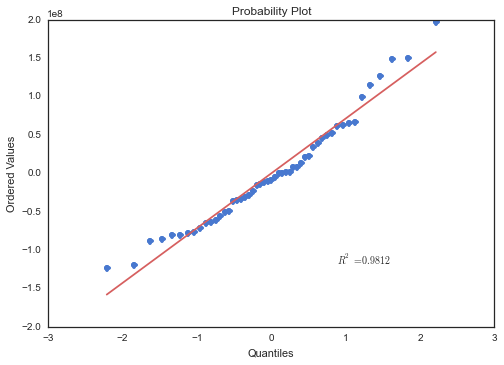

In [50]:
stats.probplot(res2.resid, dist="norm", plot=plt)
plt.show()

### Lasso Regularization

In [51]:
Model_Lasso = Lasso(9000000)

In [52]:
Model_Lasso.fit(X1_train, y1_train)

Lasso(alpha=9000000, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute='auto', tol=0.0001,
   warm_start=False)

In [53]:
print Model_Lasso.coef_
print Model_Lasso.intercept_

[       0.          2636447.45034635       -0.               -0.               -0.
        0.                0.            43698.70103014   182875.41459897
  1483719.07302081]
[ 72014424.26867199]


In [54]:
print Model_Lasso.sparse_coef_

  (0, 1)	2636447.45035
  (0, 7)	43698.7010301
  (0, 8)	182875.414599
  (0, 9)	1483719.07302


### Model 3

In [55]:
modeldf['ABC'] = 'Other'
modeldf['ABC'][modeldf['tvnetwork'].str.contains('ABC')] = 'ABC'

/Users/GarrettHoffman/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [56]:
y3, X3 = dmatrices("domesticgross ~ episodes + awards + distance" \
                   "+ C(ABC ,Treatment('Other'))",
                    data = modeldf, return_type = 'dataframe')
y3_train, y3_test, X3_train, X3_test = testtrainsplit(y3, X3, .15)

In [57]:
res3 = regress(y3_train, X3_train)
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     2.399
Date:                Fri, 09 Oct 2015   Prob (F-statistic):             0.0637
Time:                        09:08:17   Log-Likelihood:                -996.12
No. Observations:                  51   AIC:                             2002.
Df Residuals:                      46   BIC:                             2012.
Df Model:                           4                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       6.242e+07   2.37e+07      2.629      0.012      1.46e+07   1.1e+08
x1          6.191e+07   2.79e+07      2.222      0.031      5.82e+06  1.18e+08
x2          5.715e+04   1.17e+05      0.489      0.627     -1.78e+05  2.93e+05
x3           2.01e+05   2.14e+05      0.940      0.352     -2.29e+05  6.32e+05
x4          1.267e+06   8.13e+05      1.559      0.126     -3.69e+05   2.9e+06
==============================================================================
Omnibus:                        4.015   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                3.345
Skew:                           0.625   Prob(JB):                        0.188
Kurtosis:                       3.110   Cond. No.                         477.
==============================================================================
"""

In [58]:
y3_pred = (res3.predict(X3_test))
mean_squared_error(y3_pred, y3_test)

6250544768730641.0

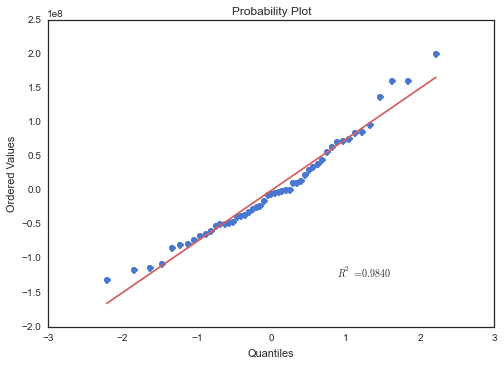

In [59]:
stats.probplot(res3.resid, dist="norm", plot=plt)
plt.show()

### Model 4

In [69]:
y4, X4 = dmatrices("domesticgross ~ np.log(episodes) + awards + distance" \
                   "+ C(ABC ,Treatment('Other'))",
                    data = modeldf, return_type = 'dataframe')
y4_train, y4_test, X4_train, X4_test = testtrainsplit(y4, X4, .15)

In [70]:
res4 = regress(y4_train, X4_train)
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     2.720
Date:                Fri, 09 Oct 2015   Prob (F-statistic):             0.0409
Time:                        09:54:18   Log-Likelihood:                -995.54
No. Observations:                  51   AIC:                             2001.
Df Residuals:                      46   BIC:                             2011.
Df Model:                           4                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       7.714e+06   5.63e+07      0.137      0.892     -1.06e+08  1.21e+08
x1          6.426e+07   2.76e+07      2.325      0.025      8.62e+06   1.2e+08
x2          1.385e+07   1.21e+07      1.143      0.259     -1.05e+07  3.82e+07
x3          1.963e+05    1.8e+05      1.090      0.281     -1.66e+05  5.59e+05
x4          1.242e+06   8.03e+05      1.547      0.129     -3.74e+05  2.86e+06
==============================================================================
Omnibus:                        3.711   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                3.079
Skew:                           0.600   Prob(JB):                        0.215
Kurtosis:                       3.082   Cond. No.                         396.
==============================================================================
"""

In [71]:
print min(res4.resid), max(res4.resid)

-125358015.877 194006722.529


In [63]:
y4_pred = (res4.predict(X4_test))
mean_squared_error(y4_pred, y4_test)

6130669188922292.0

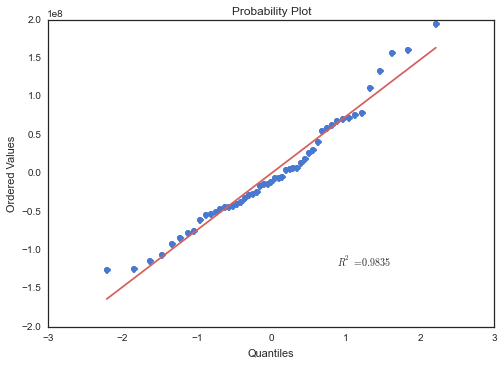

In [64]:
stats.probplot(res4.resid, dist="norm", plot=plt)
plt.show()